# 04 Classification Homework

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## Data preperation

In [2]:
!curl -O "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80876  100 80876    0     0   261k      0 --:--:-- --:--:-- --:--:--  261k


In [3]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
categorical = [column for column, ctype in df.dtypes.items() if ctype == "object"]
categorical

['lead_source', 'industry', 'employment_status', 'location']

In [5]:
numerical = [column for column, ctype in df.dtypes.items() if ctype != "object"]
numerical

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [6]:
df[categorical] = df[categorical].fillna("NA")

In [7]:
df[numerical] = df[numerical].fillna(0.0)

---

## Question 1
What is the most frequent observation (mode) for the column industry?

Answer - retail

In [9]:
df.industry.mode()

0    retail
Name: industry, dtype: object

In [11]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

---

## Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

Answer - annual_income and interaction_count

In [12]:
corr_matrix = df.corr(numeric_only=True)  
print(corr_matrix)

                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   
converted                                 0.435914       0.053131   

                          interaction_count  lead_score  converted  
number_of_courses_viewed          -0.023565   -0.004879   0.435914  
annual_income                      0.027036    0.015610   0.053131  
interaction_count                  1.000000    0.009888   0.374573  
lead_score                         0.009888    1.000000   0.193673  
converted                          0.374573    0.193673   1.000000  


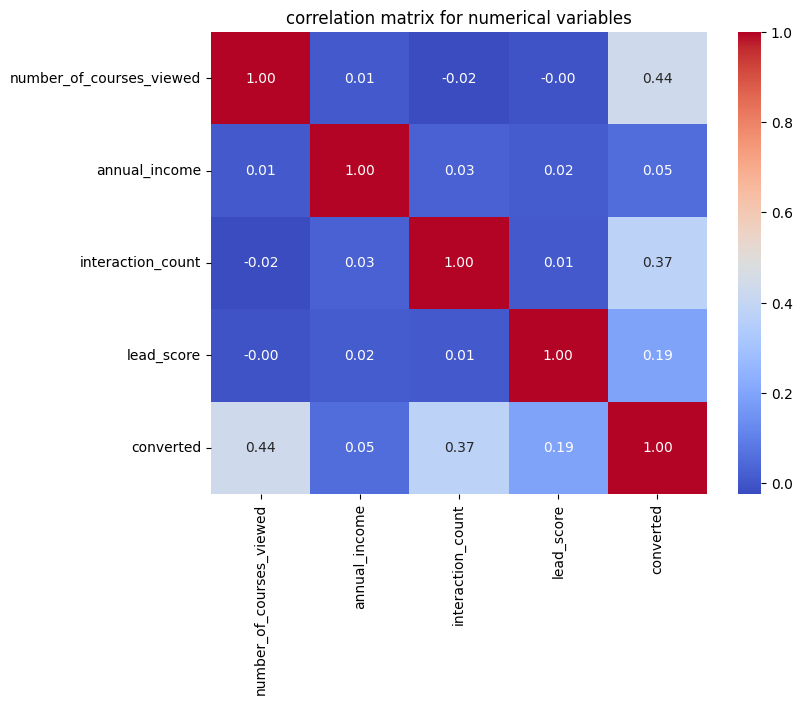

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("correlation matrix for numerical variables")
plt.show()

In [9]:
df[["interaction_count"]].corrwith(df.lead_score)

interaction_count    0.009888
dtype: float64

In [10]:
df[["number_of_courses_viewed"]].corrwith(df.lead_score)

number_of_courses_viewed   -0.004879
dtype: float64

In [11]:
df[["number_of_courses_viewed"]].corrwith(df.interaction_count)

number_of_courses_viewed   -0.023565
dtype: float64

In [17]:
df[["annual_income"]].corrwith(df.interaction_count)

annual_income    0.027036
dtype: float64

In [18]:
df[["interaction_count"]].corrwith(df.annual_income)

interaction_count    0.027036
dtype: float64

---

## Split the data

    Split your data in train/val/test sets with 60%/20%/20% distribution.
    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
    Make sure that the target value y is not in your dataframe.


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [21]:
len(df_full_train), len(df_train), len(df_val), len(df_test)

(1169, 876, 293, 293)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [23]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values
y_full_train = df_full_train.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']
del df_full_train['converted']

In [24]:
y_full_train

array([0, 1, 1, ..., 0, 1, 0], shape=(1169,))

---

## Question 3

    Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
    Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?

Answer - lead_source

In [27]:
from sklearn.metrics import mutual_info_score


def mutual_info_conversion_score(series):
    return mutual_info_score(series, y_train)

In [32]:
# mi = df_full_train[categorical].apply(mutual_info_conversion_score)
# mi.sort_values(ascending=False)
for col in categorical:
    print(col)
    print(mutual_info_score(df_train[col], y_train))

lead_source
0.03539624379726594
industry
0.011574521435657112
employment_status
0.012937677269442782
location
0.004464157884038034


---

## Question 4

    Now let's train a logistic regression.
    Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
    Fit the model on the training dataset.
        To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

Asnwer - 0.64 (closest to 0.61)

In [33]:
from sklearn.feature_extraction import DictVectorizer

In [34]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical].to_dict(orient='records')
x_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical].to_dict(orient='records')
x_val = dv.transform(val_dict)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [37]:
y_pred = model.predict_proba(x_val)[:, 1]
conversion_decision = (y_pred >= 0.5)

In [38]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = conversion_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
round(df_pred.correct.mean(), 2)

np.float64(0.61)

---

## Question 5

    Let's find the least useful feature using the feature elimination technique.
    Train a model using the same features and parameters as in Q4 (without rounding).
    Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
    For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

Answer - lead_score

In [39]:
def get_score_without_categorical_column(column=None):
    dv = DictVectorizer(sparse=False)

    # if column:
    #     filtered_categorical = list(set(categorical) - {column})
    # else:
    #     filtered_categorical = categorical
    # train_dict = df_train[filtered_categorical].to_dict(orient='records')
    filtered_columns = [col for col in df_train.columns if col != column]
    train_dict = df_train[filtered_columns].to_dict(orient='records')
    
    x_train = dv.fit_transform(train_dict)
    
    val_dict = df_val[filtered_columns].to_dict(orient='records')
    x_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(x_train, y_train)
    
    y_pred = model.predict_proba(x_val)[:, 1]
    conversion_decision = (y_pred >= 0.5)
    
    df_pred = pd.DataFrame()
    df_pred['probability'] = y_pred
    df_pred['prediction'] = conversion_decision.astype(int)
    df_pred['actual'] = y_val
    df_pred['correct'] = df_pred.prediction == df_pred.actual
    return round(df_pred.correct.mean(), 2)

In [40]:
get_score_without_categorical_column() - get_score_without_categorical_column("industry")

np.float64(0.0)

In [41]:
get_score_without_categorical_column() - get_score_without_categorical_column("employment_status")

np.float64(0.0)

In [42]:
get_score_without_categorical_column() - get_score_without_categorical_column("lead_score")

np.float64(-0.010000000000000009)

---

## Question 6

    Now let's train a regularized logistic regression.
    Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
    Train models using all the features as in Q4.
    Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?

Answer - 1

In [75]:
dv = DictVectorizer(sparse = False)
train_dict = df_train.to_dict(orient="records")
x_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
x_val = dv.transform(val_dict)
x_train.shape, y_val.shape, x_val.shape

((876, 31), (293,), (293, 31))

In [76]:
def get_score_with_regularized_parameter(regularized_parameter):
    # dv = DictVectorizer(sparse=False)

    # train_dict = df_train[categorical].to_dict(orient='records')
    # x_train = dv.fit_transform(train_dict)
    
    # val_dict = df_val[categorical].to_dict(orient='records')
    # x_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver='liblinear', C=regularized_parameter, max_iter=1000, random_state=42)
    model.fit(x_train, y_train)
    
    y_pred = model.predict_proba(x_val)[:, 1]
    conversion_decision = (y_pred >= 0.5)
    
    # df_pred = pd.DataFrame()
    # df_pred['probability'] = y_pred
    # df_pred['prediction'] = conversion_decision
    # df_pred['actual'] = y_val
    # df_pred['correct'] = df_pred.prediction == df_pred.actual
    return (y_val == conversion_decision).mean()

In [78]:
accuracy_dict = dict()
for regularzied_parameter in [0.01, 0.1, 1, 10, 100]:
    score = get_score_with_regularized_parameter(regularzied_parameter)
    print(f"Parameter:{regularzied_parameter} - Score:{score}")
    accuracy_dict[regularzied_parameter] = score

Parameter:0.01 - Score:0.6996587030716723
Parameter:0.1 - Score:0.6996587030716723
Parameter:1 - Score:0.6996587030716723
Parameter:10 - Score:0.6996587030716723
Parameter:100 - Score:0.6996587030716723


In [80]:
max(accuracy_dict, key=accuracy_dict.get)

0.01